<font size="+3" color=blue><b> <center><u>Sentiment Analysis For Beginner</u></center></b></font>

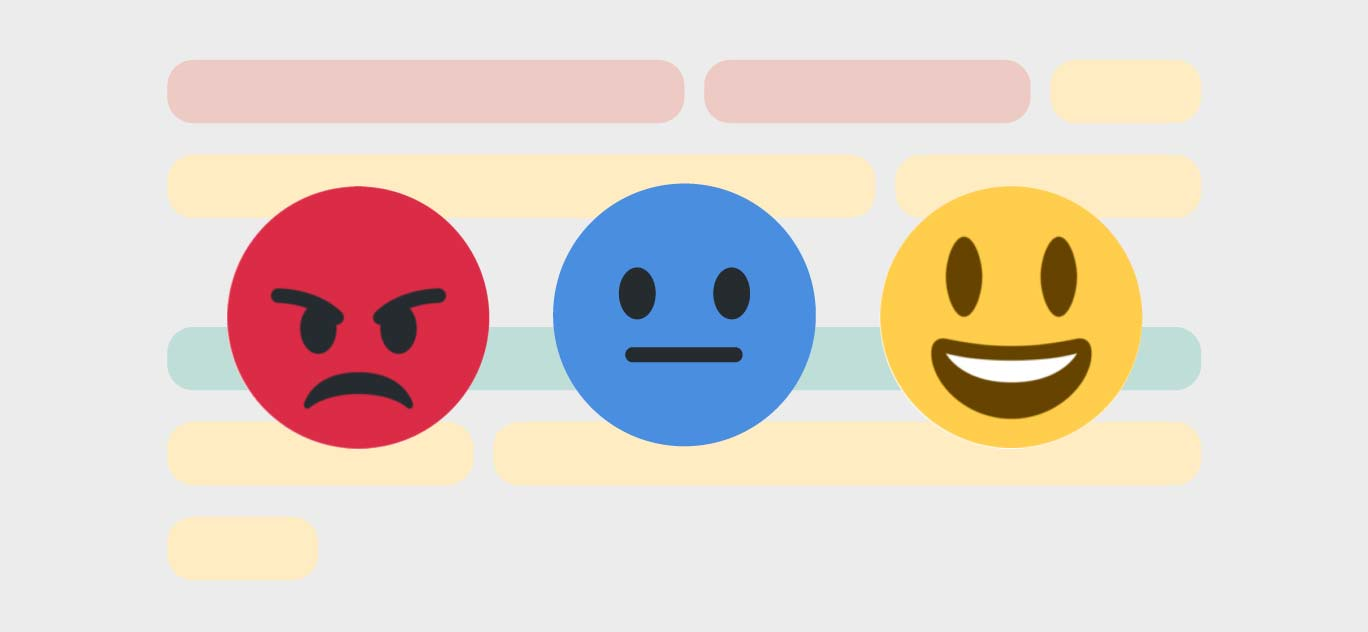

# Objective
Goal of this kernel is following:
- Learn how to train FastAI  ULMFIT on custom text data.
- Learn how to implement language model on custom data.
- Learn how to use Transfer Learning to get better accuracy.
- Provide Perfect Guide for all the tips and trick to implement Text Classification model and get better accuracy as a Beginner.

I have learned them from [FastAI](https://docs.fast.ai/)

<font size="+1" color=red ><b>Please Upvote my kernel and keep it in your favourite section if you think it is helpful.</b></font>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list"  role="tab" aria-controls="home">Table of content</h3>

<font color="blue" size=+1><b>Introduction</b></font>
* [1. What is Sentiment Analysis ?](#2)
* [2. What is Transfer Learning ?](#3)    

<font color="blue" size=+1><b>Library</b></font>
* [1. Installation](#4)
* [2. Import Libraries ](#5)
    
<font color="blue" size=+1><b> Train a text language model </b></font>
* [1. Data Loading ](#6)
* [2. Data Explorations ](#8)
* [3. Model Loading For Language Model training ](#7)
* [4. Training Language Model ](#9)
* [5. Model Summary ](#10)
* [6. Finding LR ](#11)
* [7. Hyper Parameter Tuning ](#12)
* [8. Saving Model ](#13)

<font color="blue" size=+1><b> Building a Text Classifier </b></font>
* [1. Data Loading ](#14)
* [2. Data Explorations ](#15)
* [3. Model Loading ](#16)
* [4. Training Model ](#17)
* [5. Model Summary ](#18)
* [6. Finding LR ](#19)
* [7. Hyper Parameter Tuning ](#20)
* [8. Saving Model ](#21)

<font color="blue" size=+1><b> Others </b></font>
* [1. Interpret the results](#22)
* [2. Prediction Using Trained Model](#23)
* [3. Save and Load Model](#24)
* [4. Sources](#25)

<a id="1"></a>
<font color="blue" size=+2.5><b>Introduction</b></font>


<a id="2"></a>
<font color="blue" size=+2.5><b>1.2  What is Sentiment Analysis ?</b></font>
<br/>
<br/>
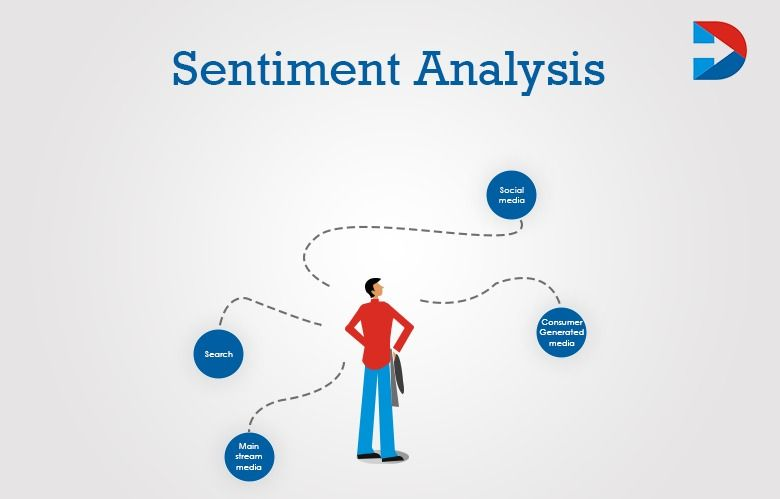

<br/>
**Sentiment analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information.**

<a id="3"></a>
<font color="blue" size=+2.5><b>1.3  What is Language Model ?</b></font>
<br/>
<br/>

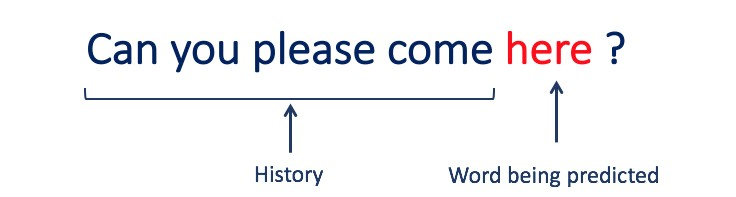
**A language model learns to predict the probability of a sequence of words. But why do we need to learn the probability of words? Let’s understand that with an example.**

I’m sure you have used Google Translate at some point. We all use it to translate one language to another for varying reasons. This is an example of a popular NLP application called Machine Translation.

In Machine Translation, you take in a bunch of words from a language and convert these words into another language. Now, there can be many potential translations that a system might give you and you will want to compute the probability of each of these translations to understand which one is the most accurate.
[Source](https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-language-model-nlp-python-code/)

<a id="5"></a>


<font color="blue" size=+2.5><b>2. Library</b></font>

<a id="4"></a>
<font color="blue" size=+2.5><b>2.1 Installation</b></font>
* Numpy
* Pandas
* Matplotlib
* Fastai

<a id="5"></a>
<font color="blue" size=+2.5><b>2.2 Library Import</b></font>

In [1]:
# !pip install fastai
# import libraries
import fastai
from fastai import *
from fastai.text import * 
import pandas as pd
import numpy as np
from functools import partial
import io
import os

<font color="blue" size=+2.5><b> 3. Train a Text Language Model </b></font>

<a id="6"></a>
<font color="blue" size=+2.5><b> 3.1 Data Loading For training Language Model </b></font>

In [2]:
df_imdb = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

<a id="7"></a>
<font color="blue" size=+2.5><b> 3.2 Data Exploration </b></font>

In [3]:
df_imdb.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

<a id="8"></a>
<font color="blue" size=+2.5><b> 3.3 Model Loading For Language Model training </b></font>


***Create a databunch for a text language model to get the data ready for training a language model. The text will be processed, tokenized and numericalized by a default processor, if you want to apply a customized tokenizer or vocab, you just need to create them.***

In [4]:
data_lm = (TextList.from_df(df_imdb)
           #Inputs: all the text files in path
            .split_by_rand_pct(0.20)
           #We randomly split and keep 20% for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=128))
data_lm.save('tmp_lm')

In [5]:
data_lm.show_batch()

Now we can create a language model based on the architecture 
[AWD_LSTM](https://docs.fast.ai/text.models.html#AWD_LSTM)

In [6]:
# Language model AWD_LSTM
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)

<a id="9"></a>
<font color="blue" size=+2.5><b> 3.4 Model Summary </b></font>


In [7]:
print('Model Summary:')
print(learn.layer_groups)

Model Summary:
[Sequential(
  (0): WeightDropout(
    (module): LSTM(400, 1152, batch_first=True)
  )
  (1): RNNDropout()
), Sequential(
  (0): WeightDropout(
    (module): LSTM(1152, 1152, batch_first=True)
  )
  (1): RNNDropout()
), Sequential(
  (0): WeightDropout(
    (module): LSTM(1152, 400, batch_first=True)
  )
  (1): RNNDropout()
), Sequential(
  (0): Embedding(47424, 400, padding_idx=1)
  (1): EmbeddingDropout(
    (emb): Embedding(47424, 400, padding_idx=1)
  )
  (2): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=47424, bias=True)
    (output_dp): RNNDropout()
  )
)]


<a id="10"></a>
<font color="blue" size=+2.5><b> 3.5 Finding LR </b></font>


**Lets train our language model. First, we call lr_find to analyze and find an optimal learning rate for our problem, then we fit or train the model for a few epochs. Finally we unfreeze the model and runs it for a few more epochs. So we have a encoder trained and ready to be used for our classifier and it is recorded on disk.**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 6.92E-03


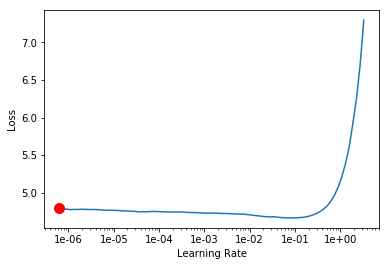

In [8]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

<a id="11"></a>
<font color="blue" size=+2.5><b> 3.6 HyperParameter Tuning For Model Training </b></font>

In [9]:
learn.fit_one_cycle(1, 1e-2)
learn.save('lm_hyper')

In [10]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

<a id="12"></a>
<font color="blue" size=+2.5><b> 3.7 Saving Model After Training </b></font>

In [11]:
learn.save_encoder('ft_enc')


<a id="13"></a>
<font color="blue" size=+2.5><b> 4. Building and Training a Text Classifier </b></font>

<a id="14"></a>
<font color="blue" size=+2.5><b> 4.1 Loading Data For Text Classification </b></font>


In [12]:
data_clas = (TextList.from_df(df_imdb, cols=["review"], vocab=data_lm.vocab)
             .split_by_rand_pct(0.20)
             .label_from_df('sentiment')
             .databunch(bs=128))

data_clas.save('tmp_class')


<a id="15"></a>
<font color="blue" size=+2.5><b> 4.2 Loading Text Classification Model </b></font>


In [13]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)


**we will have to load the encoder previously trained (the language model).**

In [14]:
learn.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (40000 items)
x: TextList
xxbos xxmaj one of the other reviewers has mentioned that after watching just 1 xxmaj oz episode you 'll be hooked . xxmaj they are right , as this is exactly what happened with me . 
 
  xxmaj the first thing that struck me about xxmaj oz was its brutality and unflinching scenes of violence , which set in right from the word xxup go . xxmaj trust me , this is not a show for the faint hearted or timid . xxmaj this show pulls no punches with regards to drugs , sex or violence . xxmaj its is hardcore , in the classic use of the word . 
 
  xxmaj it is called xxup oz as that is the nickname given to the xxmaj oswald xxmaj maximum xxmaj security xxmaj state xxmaj xxunk . xxmaj it focuses mainly on xxmaj emerald xxmaj city , an experimental section of the prison where all the cells have glass fronts and face xxunk , so privacy is not high on the agenda . xxmaj em xxmaj city is home to many .. xxmaj aryans , xxmaj

**Now, the training cycle is repeated: lr_find, freeze except last layer,..., unfreeze the model and saving the final trained model.**

In [15]:
learn.freeze_to(-1)
learn.summary()

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [61, 400]            0          False     
______________________________________________________________________
RNNDropout           [61, 1152]           0          False     
______________________________________________________________________
RNNDropout           [61, 1152]           0          False     
______________________________________________________________________
BatchNorm1d          [1200]               2,400      True      
______________________________________________________________________
Dropout              [1200]               0          False     
______________________________________________________________________
Linear               [50]                 60,050     True      
______________________________________________________________________
ReLU                 [50]                 0          False     
________________________________________________

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.37E-03
Min loss divided by 10: 7.59E-02


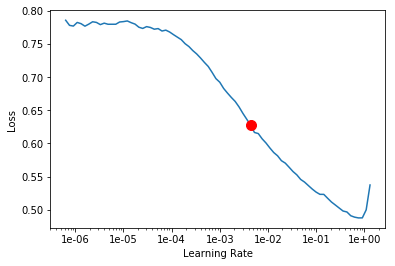

In [16]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [17]:
learn.fit_one_cycle(1, 1e-3)

In [18]:
learn.save('stage1')

In [19]:
learn.load('stage1')
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(5e-3/2., 5e-3))
learn.save('stage2')

<a id="22"></a>
<font color="blue" size=+2.5><b>5.1 Interpret the results</b></font>
<br/>

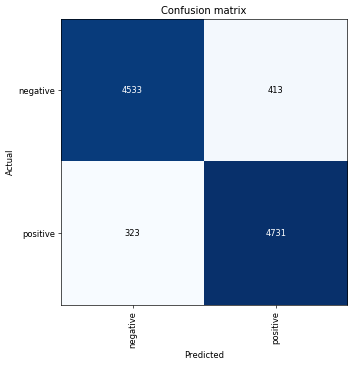

In [20]:
from fastai.vision import ClassificationInterpretation

interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [21]:
interp = TextClassificationInterpretation.from_learner(learn)
interp.show_top_losses(10)

<a id="23"></a>
<font color="blue" size=+2.5><b>5.3 Save and Load Model</b></font>
<br/>


In [22]:
learn.export()
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')

<a id="24"></a>
<font color="blue" size=+2.5><b>5.4 Sources</b></font>
<br/>
* [Fastai MOOC](https://course.fast.ai/)
* [Fastai library](https://docs.fast.ai/)

<a id="18"></a>
<font color="blue" size=+2.5><b>Feedback and Support</b></font>
<br/>
* Your feedback is much appreciated
* Please UPVOTE if you LIKE this notebook
* Comment if you have any doubts or you found any errors in the notebook